In [1]:
# you might need these, I'll update the docker image soon!
! pip install GPSphoto geopandas exifread piexif

In [1]:
from ipywidgets import FloatProgress, Layout
from IPython.display import display
from micasense import imageset as imageset
from micasense import capture as capture
import multiprocessing
import glob, shutil, os

import cv2
import numpy as np
import matplotlib.pyplot as plt


import micasense.imageutils as imageutils
import micasense.plotutils as plotutils

import exiftool
import datetime

import subprocess
import math

from utils import *
# from georeg import *


/usr/local/envs/micasense/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# this isn't really good practice but there are a few deprecated tools in the Micasense stack so we'll ignore some of these warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
project_path = os.path.join('../../../', '10_01_20', '0002SET', '000_test')
project_path

'../../../10_01_20/0002SET/000_test'

In [12]:
process_panel_img(panelNames = project_path+'/panel', panelCorners=None, useDLS=True)

#Q- what is panelNames? The panel directory? 
#Q- what is panelCorners?

OSError: All files in file list must be a file. The following file is not:
.

In [ ]:
get_warp_matrix() 
#Q- assume this is unchanged from micasense capture.py?

In [ ]:
decdeg2dms(dd) #Q- assume this is used in writing metadata but why do we want decimal degrees in degree minutes, seconds? 
#I think decimal degrees should be the default. But I guess we could keep this to have it as option

In [18]:
write_exif_csv(img_set=project_path+'/raw_water_imgs', outputPath=project_path)
#Q- don't you need a line like this before calling the captures? imageset.ImageSet.from_directory(project_path+'/raw_water_imgs').captures
#TODO- make sure metadata is getting accurately called 
#Q- do we want to use this weird uuid or rename them by numbers like I did in my code?

AttributeError: 'str' object has no attribute 'captures'

In [6]:
save_images(img_set = project_path+'/raw_water_imgs', outputPath=project_path+'/test_tifs', 
            thumbnailPath=project_path+'/test_thumbs', panel_irradiance=project_path+'/panel', 
            img_type='radiance', warp_img_capture= project_path+'/align_img')
#Q-Should save_images be a parameter in the process_micasense_subset function?
#Q- don't you need a line like this before calling the captures? imageset.ImageSet.from_directory(project_path+'/raw_water_imgs').captures


Aligning images. Depending on settings this can take from a few seconds to many minutes


AttributeError: 'str' object has no attribute 'images'

In [8]:
write_img_exif(fullCsvPath = project_path+'/lt_imgs/log.csv', outputPath=project_path+'/lt_imgs/log.csv')
#Q- how does this function know what images to write EXIF data into? Why does it need an outputPath?

No SourceFile '../../../10_01_20/0002SET/000_test/lt_imgs/log.csv' in imported CSV database
(full path: '/home/jovyan/10_01_20/0002SET/000_test/lt_imgs/log.csv')


True

In [21]:
process_micasense_subset(img_dir=project_path+'/raw_water_imgs', panelNames = project_path+'/panel', warp_img_dir = project_path+'/align_img', img_type='radiance', overwrite='True', panelCorners=None, sky=False)
#Q- why is the warp_img_dir default None? Isn't it deff needed? Will the function not run when warp_img_dir = None?
#Q- unsure of what panelCorners and sky is 
#Yay this function worked! It created lt_imgs and lt_thumbnails folders

Loading ImageSet from: ../../../10_01_20/0002SET/000_test/raw_water_imgs
Loading ImageSet from: ../../../10_01_20/0002SET/000_test/align_img
used warp dir ../../../10_01_20/0002SET/000_test/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 3
Finished aligning band 1
Finished aligning band 2
Finished aligning band 4


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:45.322822
Alignment+Saving rate: 0.46 images per second
Finished saving images.
Finished saving image metadata.


    1 directories scanned
   21 image files updated


'../../../10_01_20/0002SET/000_test/raw_water_imgs/../lt_imgs'

In [ ]:
key_function() #Q- I assume this is for writing out pandas dataframe? 

In [13]:
load_img_fn_and_meta(img_dir=project_path+'/lt_imgs')

[{'Latitude': 38.69639166666666,
  'Longitude': -75.9803888888889,
  'Altitude': 88.2,
  'UTC-Time': '16:2:25',
  'Date': '10/01/2020',
  'full_filename': '../../../10_01_20/0002SET/000_test/lt_imgs/O9HfPYnuXF8IcU00wjgd.tif',
  'filename': 'O9HfPYnuXF8IcU00wjgd.tif',
  'yaw': 352.0263166169305,
  'pitch': 352.61486881500105,
  'roll': 4.091073859301275},
 {'Latitude': 38.69640833333333,
  'Longitude': -75.98025555555556,
  'Altitude': 87.4,
  'UTC-Time': '16:2:27',
  'Date': '10/01/2020',
  'full_filename': '../../../10_01_20/0002SET/000_test/lt_imgs/HX1fvIXAf6Lpp2C06v74.tif',
  'filename': 'HX1fvIXAf6Lpp2C06v74.tif',
  'yaw': 348.7910616218606,
  'pitch': 352.0830948150911,
  'roll': 343.30328764935564},
 {'Latitude': 38.696413888888884,
  'Longitude': -75.98019166666667,
  'Altitude': 87.1,
  'UTC-Time': '16:2:29',
  'Date': '10/01/2020',
  'full_filename': '../../../10_01_20/0002SET/000_test/lt_imgs/B0jqvdGU6SLdqBddDag1.tif',
  'filename': 'B0jqvdGU6SLdqBddDag1.tif',
  'yaw': 339.35

In [14]:
load_images(img_list = project_path+'/lt_imgs')
#Q- what is img_list supposed to be?

RasterioIOError: '.' not recognized as a supported file format.

In [15]:
retrieve_imgs_and_metadata(img_dir = project_path+'/lt_imgs')
#

(array([[[[0.00766838, 0.00797753, 0.00794778, ..., 0.00747557,
           0.0075878 , 0.00776438],
          [0.00861961, 0.00881223, 0.00884128, ..., 0.00776441,
           0.00773785, 0.00780271],
          [0.01103434, 0.01001822, 0.00950219, ..., 0.00775505,
           0.00767811, 0.00786729],
          ...,
          [0.00498179, 0.00503302, 0.00499786, ..., 0.00579232,
           0.00570615, 0.00580123],
          [0.00479913, 0.00516063, 0.00473677, ..., 0.00590552,
           0.0056131 , 0.00526311],
          [0.00478029, 0.00501931, 0.00494563, ..., 0.00593847,
           0.00591417, 0.00601962]],
 
         [[0.01313317, 0.01280296, 0.01303893, ..., 0.0120903 ,
           0.0120448 , 0.01155776],
          [0.01344838, 0.01417297, 0.01307994, ..., 0.01159037,
           0.01169156, 0.01150514],
          [0.01611292, 0.01428596, 0.01374868, ..., 0.011717  ,
           0.01168097, 0.01172168],
          ...,
          [0.00984616, 0.00978145, 0.01030662, ..., 0.01113922,
   

In [ ]:
#TODO- test all the chl algs in utils.py

In [29]:
basic_std_glint_correction(lt_dir = project_path+'/lt_imgs', glint_corrected_lt_dir = project_path+'/lt_glint_corrected_imgs', glint_std_factor=1)
#Q- should glint_corrected_lt_dir be changed to outputPath? 
#Q- when is this outputPath created? I guess maybe in the big processing function? (manauly made this folder so function would work)
#Q- confused on glint_std_factor- what is the default? 

True

In [32]:
single_lsky_mobley(sky_lt_dir = project_path+'/sky_lt_imgs', lt_dir = project_path+'/lt_imgs', lw_dir = project_path+'/lw_imgs', rho=0.028)
#Q- we will need to change Line 663 to include this correction I think 
# I ran the below code (process_micasense_subset) in order to get lsky_imgs for this code to work
#I manually created lw_imgs for the function to run

True

In [30]:
process_micasense_subset(img_dir=project_path+'/raw_sky_imgs', panelNames = project_path+'/panel', warp_img_dir=project_path+'/align_img', 
                                           img_type='radiance', overwrite=True, sky=True)

Loading ImageSet from: ../../../10_01_20/0002SET/000_test/raw_sky_imgs
Loading ImageSet from: ../../../10_01_20/0002SET/000_test/align_img
used warp dir ../../../10_01_20/0002SET/000_test/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 1
Finished aligning band 4
Finished aligning band 3


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:04.544420
Alignment+Saving rate: 0.44 images per second
Finished saving images.
Finished saving image metadata.


    1 directories scanned
    2 image files updated


'../../../10_01_20/0002SET/000_test/raw_sky_imgs/../sky_lt_imgs'

In [33]:
nir_correction(sky_lt_dir = project_path+'/sky_lt_imgs', lt_dir = project_path+'/lt_imgs', lw_dir = project_path+'/lw_imgs')
#Q- should we change the name of this to black_pixel_correction?
#This surprisingly worked on first try :)

True

In [5]:
hochberg_deglinting(lt_dir = project_path+'/lt_imgs', lw_dir = project_path+'/lw_imgs')
#Q- hmmm what to name this.. how about hochberg_hedley_correction? or is that too long? 
#I mostly used the Hedley paper but he references Hochberg throughout. Maybe Hedley_correction is okay? 
#I think the deglinting is too confusing with the other deglinting approach so think we should keep this as correction? 
#or we move it up to the deglinting section and consider it a purely deglinting approach? 
#changed this function to focus on Lt, instead of Ruas but getting an error I need to troubleshoot

TypeError: expected 1D vector for x

In [43]:
panel_irradiance_normalizaton(panel_dir = project_path+'/panel', lw_dir = project_path+'/lw_imgs', rrs_dir = project_path+'/rrs_imgs')
#I manually made rrs_imgs directory for the function to work 
#Q- could we call this function something like panel_Ed? 
#Thinking we would have three functions to get Ed: 1) DLS, 2) Panel, 3) DLS correction using panel 
#TODO- have this function save Ed as a .csv so we plot it? 
#Q- what is the difference between this function and process_panel_img?

Loading ImageSet from: ../../../10_01_20/0002SET/000_test/panel


True

In [ ]:
rewrite_exif_data()
#Q- I think I understand this function.... it just rewrites the log.csv in each directory to have the proper metadata?

In [44]:
process_raw_to_rrs(main_dir =project_path, ed_method='panel', glint_correct=True, glint_std_factor=1.5, sky_reflection_correction='single_lsky')
#This function works but still needs some editing- would like to discuss how and where to put the other Ed calculations. 

Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../10_01_20/0002SET/000_test/raw_water_imgs
Loading ImageSet from: ../../../10_01_20/0002SET/000_test/align_img
used warp dir ../../../10_01_20/0002SET/000_test/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 1
Finished aligning band 4
Finished aligning band 3


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:37.208539
Alignment+Saving rate: 0.56 images per second
Finished saving images.


    1 directories scanned
   21 image files updated


Finished saving image metadata.


    1 directories scanned
   21 image files updated


Finished Lt glint correction.
Not doing any sky reflection correction.
Normalizing by panel irradiance (Lw -> Rrs).
Loading ImageSet from: ../../../10_01_20/0002SET/000_test/panel
All data has been output as Rrs imagery with True glint removal, XXX sky reflection and normalized by XXX irradiance.


    1 directories scanned
   21 image files updated


True

In [4]:
#Attempted to add dls_Ed function on line 610 but would like to discuss
dls_Ed(raw_water_dir = project_path+'/raw_water_imgs', output_dir = project_path)


Loading ImageSet from: ../../../10_01_20/0002SET/000_test/raw_water_imgs


### Visualization

(2, 5, 926, 1225)
(5, 926, 1225)
     Latitude  Longitude  Altitude UTC-Time        Date  \
id                                                        
0   38.696408 -75.979653       0.5  15:50:6  10/01/2020   
1   38.696411 -75.979653       0.3  15:50:8  10/01/2020   

                                        full_filename  \
id                                                      
0   ../../../10_01_20/0002SET/000_test/sky_lt_imgs...   
1   ../../../10_01_20/0002SET/000_test/sky_lt_imgs...   

                    filename         yaw       pitch        roll  \
id                                                                 
0   uIB65UQxHOWczZyYrP8w.tif  356.930357  310.178206  177.082528   
1   S6Sib7wd0gwOFayIuBtp.tif  325.560830  286.290135  212.395524   

         DateTimeStamp  
id                      
0  2020-10-01 15:50:06  
1  2020-10-01 15:50:08  


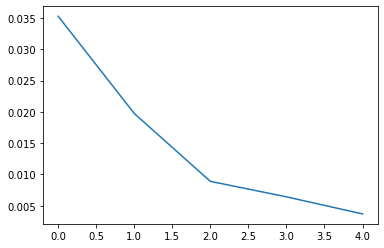

In [37]:
lsky_imgs, lsky_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/sky_lt_imgs')
print(lsky_imgs.shape)
print(lsky_imgs[0].shape) #lsky_imags[0] is the first image? 
plt.plot(lsky_imgs[0].mean(axis=(1,2))) 
#These are in units of W right? I'm assuming W because they seem small.. 
print(lsky_img_metadata)


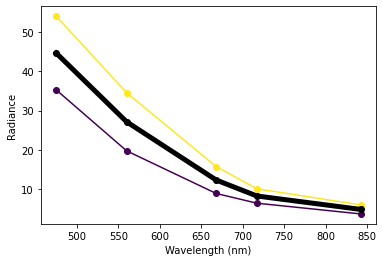

In [97]:
#or we could plot spectra for every image capture and the mean:
colors = plt.cm.viridis(np.linspace(0,1,len(lsky_imgs)))
wv = [475, 560, 668, 717, 842]
for i in range(len(lsky_imgs)):
    plt.plot(wv, lsky_imgs[i,0:5,:,:].mean(axis=(1,2))*1000,  marker = 'o', color=colors[i], label="")
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Radiance') 
plt.plot(wv, lsky_imgs[:,0:5,:,:].mean(axis=(0,2,3))*1000,  marker = 'o', color='black', linewidth=5, label='Average')

#this matches mine perfectly from previous code

(21, 5, 926, 1225)
(5, 926, 1225)


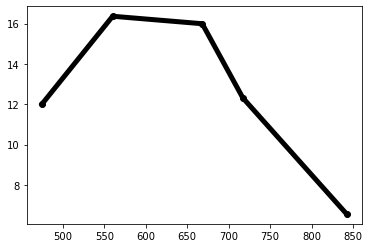

In [99]:
lt_imgs, lt_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/lt_imgs')
print(lt_imgs.shape)
print(lt_imgs[6,0:5,:,:].shape)

#for i in range(len(lt_imgs)):
#    plt.plot(wv, lt_imgs[i,0:5,:,:].mean(axis=(1,2)),  marker = 'o', color=colors[i], label="")
#    plt.xlabel('Wavelength (nm)')
#    plt.ylabel('Radiance') 
plt.plot(wv, lt_imgs[:,0:5,:,:].mean(axis=(0,2,3))*1000,  marker = 'o', color='black', linewidth=5, label='Average')

#I can't figure out how to take mean of 4 dimensional array the right way??
#the mean matches the shape from my previous code but is slightly higher in magnitude? My previous one only went up to 14 mw/m2/sr/nm

In [100]:
rrs_imgs, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_imgs')
print(rrs_imgs.shape)

(21, 5, 926, 1225)


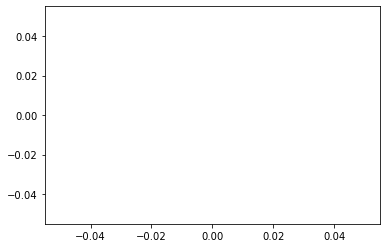

In [102]:
#for i in range(len(rrs_imgs)):
#    plt.plot(wv, rrs_imgs[i,0:5,:,:].mean(axis=(1,2)),  marker = 'o', color=colors[i], label="")
#    plt.xlabel('Wavelength (nm)')
#    plt.ylabel('Rrs (sr-1)') 
plt.plot(wv, rrs_imgs[:,0:5,:,:].mean(axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')
#not sure why this isnt plotting?

Text(0, 0.5, 'Latitude')

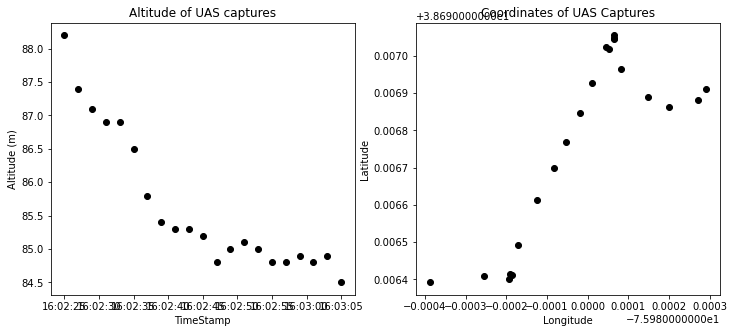

In [103]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#plot altitude
ax[0].scatter(rrs_img_metadata['DateTimeStamp'].values, rrs_img_metadata['Altitude'].values, color='black')
# ax[0].set_xticks(rotation=60)
ax[0].set_title("Altitude of UAS captures")
ax[0].set_xlabel("TimeStamp")
ax[0].set_ylabel("Altitude (m)")

#plot lat, lon
ax[1].scatter(rrs_img_metadata['Longitude'].values, rrs_img_metadata['Latitude'].values, color='black')
ax[1].set_title("Coordinates of UAS Captures")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")

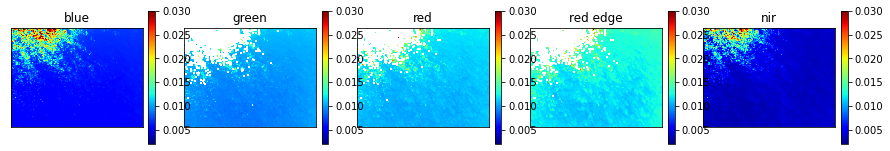

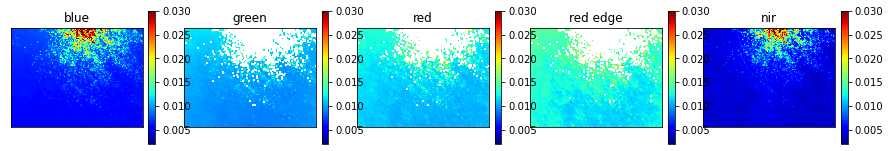

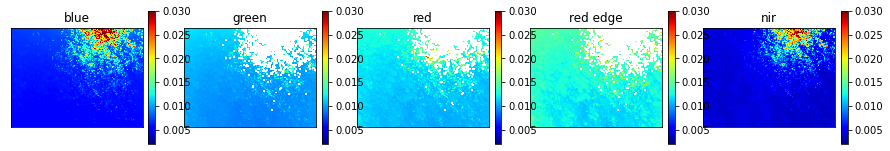

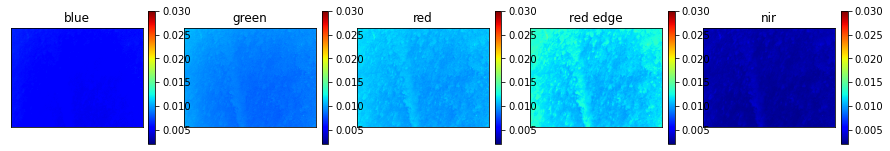

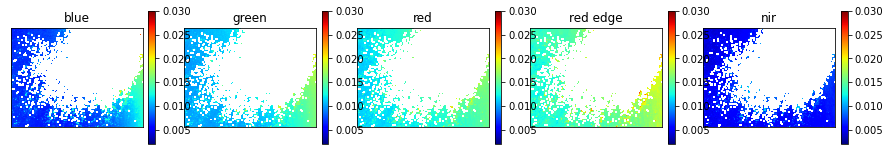

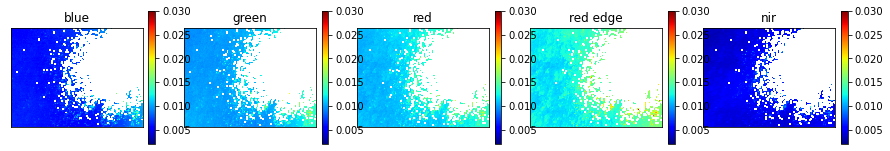

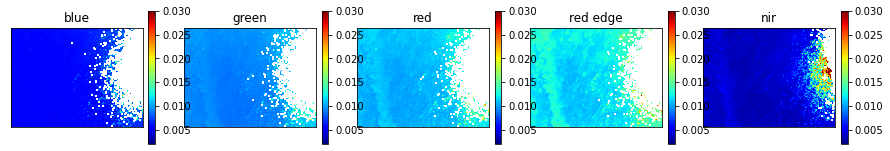

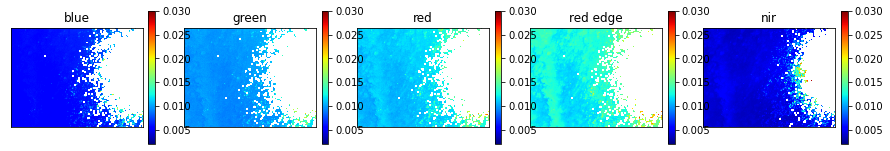

In [104]:
band_names = ['blue', 'green', 'red', 'red edge', 'nir']

for j in range(8):
    fig, ax = plt.subplots(1,5, figsize=(15,4))

    for i in range(5):
        im = ax[i].imshow(rrs_imgs[j,i],cmap='jet', vmin=0.002, vmax=0.03)
        fig.colorbar(im, ax=ax[i], fraction=0.046, pad=0.04)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(band_names[i])
    plt.show()
    
#These seem to be in accurate Rrs value range